In [1]:
from functions import *

parameters = {}
parameters['num_devices'] = 20
parameters['device_indices'] = [x+1 for x in range(parameters['num_devices'])]

# device parameters
'''
In fact, device parameters other than 'transmitter_attenuation', 'receiver_gain' and 'center_freq' don't notably affect the performance
as the rx() of each PlutoSDR takes only a few milliseconds and bandwidth is abundant for the simple signal generated.

'''
parameters['sample_rate'] = 10e6  # Hz
parameters['num_samples'] = 100  # number of samples per call to rx()
parameters['center_freq'] = 2.4e9  # Hz
parameters['bandwidth'] = 100  # Hz
parameters['transmitter_attenuation'] = 0  # dB
parameters['receiver_gain'] = 30  # dB
parameters['wavelength'] = 3e8/parameters['center_freq']

# imaging parameters
parameters['detection_size'] = 0.2  # RTI

parameters['doi_size'] = 3  # domain of interest
parameters['resolution'] = (60, ) * 2  # pixel count
parameters['alpha'] = 1e3  # 1e2
parameters['denoising_weight'] = 0.03  # 0.03
parameters['threshold'] = 0.03  # 0.4

parameters['k0'] = 2*np.pi/parameters['wavelength']
parameters['cellrad'] = parameters['doi_size']/(parameters['resolution'][0]*np.sqrt(np.pi))

parameters['device_coordinates'] = get_device_coordinates(parameters)
parameters['grid_coordinates'] = get_grid_coordinates(parameters)
parameters['flag'] = False
parameters['saved_Pinc'] = False  # Change this into "False" will replace 1st frame as new Pinc
parameters['normailze'] = False

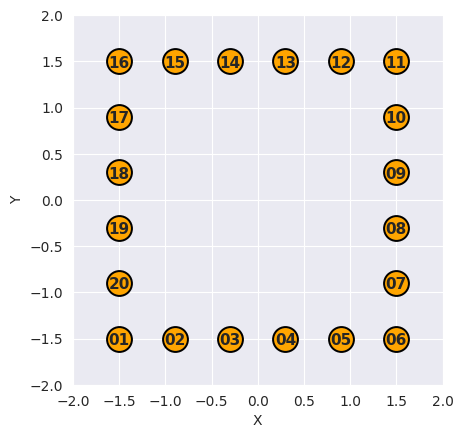

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, aspect=1) 
# Draw the circles
sns.scatterplot(x=parameters['device_coordinates'].T[0], 
                y=parameters['device_coordinates'].T[1], 
                s=320, color='orange', 
                edgecolor='black',ax=ax, legend=False)

# Add the labels
for i, coordinates in enumerate(parameters['device_coordinates']):
    ax.text(coordinates[0], coordinates[1], s=f'{i+1:02d}', ha='center', va='center_baseline', fontsize=11, fontweight='bold')

# Set the axis limits and labels
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()
fig.savefig('my_plot.png', dpi=500)


In [3]:
from reconstruction_algorithm.xPRA import xPRA
from skimage.restoration import denoise_tv_chambolle


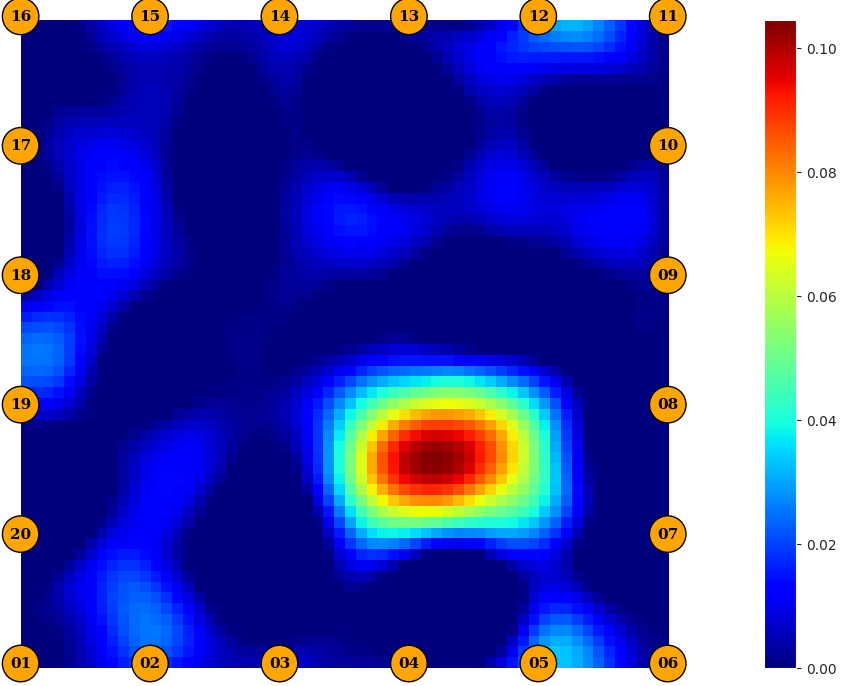

In [75]:
Pinc = np.load('result/water/Pinc.npy')
Ptot = np.load('result/water/water.npy')

result = xPRA(parameters, Pinc, Ptot)
# result[result<0.051] = 0
# result = denoise_tv_chambolle(result, 0.1)
result_visualization(parameters, result, show_coordinate=False, show_device=True)

plt.savefig('haha/my_plot.png', dpi=400)


In [53]:
k = 1
for i in tqdm(range(73, 190)):
    Pinc = np.load('result/multiple_people/Pinc.npy')
    Ptot = np.load(f'result/multiple_people/Ptot{i}.npy')

    result = xPRA(parameters, Pinc, Ptot)
    result[result<0.05] = 0
    result = denoise_tv_chambolle(result, 0.06)
    result_visualization(parameters, result, show_coordinate=False, show_device=True)
    

    plt.savefig(f'haha/{k}.png', dpi=400)
    k = k+ 1
    plt.close()

100%|██████████| 117/117 [01:14<00:00,  1.56it/s]
